In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [14]:
from zipfile import ZipFile
import geopandas as gpd

In [2]:
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

http://www-personal.umich.edu/~grengs/files/Grengs2010_JobAccessibilityModalMismatch_JTG.pdf

# Data

* **MOGO stations**: http://data.ferndalemi.gov/datasets/aed58cd4930d44db9da8867c5e784efd_0

Most is on the [Detroit Data Portal](https://data.detroitmi.gov/) 

SEMCOG also has decent info and some [neat maps](https://maps.semcog.org/accessparks/)

In [ ]:
CSV_PATH = os.path.join('..', 'data', 'preprocessing', 'volunteer_opportunities.csv')
volunteer = pd.read_csv(CSV_PATH, encoding='latin1') 
volunteer.head()

In [11]:
ZIP_PATH = os.path.join('data_raw', 'ACS_17_5YR_B08134.zip') 
with ZipFile(ZIP_PATH) as zip_file:
    with zip_file.open('ACS_17_5YR_B08134.csv') as my_zipped_csv:
        mi_transit = pd.read_csv(my_zipped_csv)
    with zip_file.open('ACS_17_5YR_B08134_metadata.csv') as my_zipped_csv:
        mi_header = pd.read_csv(my_zipped_csv)

In [12]:
mi_transit.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD05,HD02_VD05,HD01_VD06,HD02_VD06,HD01_VD07,HD02_VD07,HD01_VD08,HD02_VD08,HD01_VD09,HD02_VD09,HD01_VD10,HD02_VD10,HD01_VD11,HD02_VD11,HD01_VD12,HD02_VD12,HD01_VD13,HD02_VD13,HD01_VD14,HD02_VD14,HD01_VD17,HD02_VD17,HD01_VD18,HD02_VD18,HD01_VD19,HD02_VD19,HD01_VD20,HD02_VD20,HD01_VD21,HD02_VD21,HD01_VD22,HD02_VD22,HD01_VD23,HD02_VD23,HD01_VD24,HD02_VD24,HD01_VD25,HD02_VD25,HD01_VD26,HD02_VD26,HD01_VD28,HD02_VD28,HD01_VD29,HD02_VD29,HD01_VD30,HD02_VD30,HD01_VD31,HD02_VD31,HD01_VD32,HD02_VD32,HD01_VD33,HD02_VD33,HD01_VD34,HD02_VD34,HD01_VD35,HD02_VD35,HD01_VD36,HD02_VD36,HD01_VD37,HD02_VD37,HD01_VD39,HD02_VD39,HD01_VD40,HD02_VD40,HD01_VD41,HD02_VD41,HD01_VD42,HD02_VD42,HD01_VD43,HD02_VD43,HD01_VD44,HD02_VD44,HD01_VD45,HD02_VD45,HD01_VD46,HD02_VD46,HD01_VD47,HD02_VD47,HD01_VD48,HD02_VD48,HD01_VD49,HD02_VD49,HD01_VD50,HD02_VD50,HD01_VD51,HD02_VD51,HD01_VD52,HD02_VD52,HD01_VD53,HD02_VD53,HD01_VD54,HD02_VD54,HD01_VD55,HD02_VD55,HD01_VD56,HD02_VD56,HD01_VD57,HD02_VD57,HD01_VD58,HD02_VD58,HD01_VD59,HD02_VD59,HD01_VD60,HD02_VD60,HD01_VD61,HD02_VD61,HD01_VD62,HD02_VD62,HD01_VD63,HD02_VD63,HD01_VD64,HD02_VD64,HD01_VD65,HD02_VD65,HD01_VD66,HD02_VD66,HD01_VD67,HD02_VD67,HD01_VD68,HD02_VD68,HD01_VD71,HD02_VD71,HD01_VD72,HD02_VD72,HD01_VD73,HD02_VD73,HD01_VD74,HD02_VD74,HD01_VD75,HD02_VD75,HD01_VD76,HD02_VD76,HD01_VD77,HD02_VD77,HD01_VD78,HD02_VD78,HD01_VD79,HD02_VD79,HD01_VD80,HD02_VD80,HD01_VD82,HD02_VD82,HD01_VD83,HD02_VD83,HD01_VD84,HD02_VD84,HD01_VD85,HD02_VD85,HD01_VD86,HD02_VD86,HD01_VD87,HD02_VD87,HD01_VD88,HD02_VD88,HD01_VD89,HD02_VD89,HD01_VD90,HD02_VD90,HD01_VD91,HD02_VD91,HD01_VD93,HD02_VD93,HD01_VD94,HD02_VD94,HD01_VD95,HD02_VD95,HD01_VD96,HD02_VD96,HD01_VD97,HD02_VD97,HD01_VD98,HD02_VD98,HD01_VD99,HD02_VD99,HD01_VD100,HD02_VD100,HD01_VD101,HD02_VD101,HD01_VD102,HD02_VD102,HD01_VD104,HD02_VD104,HD01_VD105,HD02_VD105,HD01_VD106,HD02_VD106,HD01_VD107,HD02_VD107,HD01_VD108,HD02_VD108,HD01_VD109,HD02_VD109,HD01_VD110,HD02_VD110,HD01_VD111,HD02_VD111,HD01_VD112,HD02_VD112,HD01_VD113,HD02_VD113,HD01_VD116,HD02_VD116,HD01_VD117,HD02_VD117,HD01_VD118,HD02_VD118,HD01_VD119,HD02_VD119,HD01_VD120,HD02_VD120,HD01_VD121,HD02_VD121,HD01_VD122,HD02_VD122,HD01_VD123,HD02_VD123,HD01_VD124,HD02_VD124,HD01_VD125,HD02_VD125,HD01_VD128,HD02_VD128,HD01_VD129,HD02_VD129,HD01_VD130,HD02_VD130,HD01_VD131,HD02_VD131,HD01_VD132,HD02_VD132,HD01_VD133,HD02_VD133,HD01_VD134,HD02_VD134,HD01_VD135,HD02_VD135,HD01_VD136,HD02_VD136
0,1400000US26001000100,26001000100,"Census Tract 1, Alcona County, Michigan",398,68,61,29,13,10,60,23,74,29,32,15,54,30,66,34,14,11,24,15,367,65,42,23,5,7,60,23,74,29,32,15,54,30,62,33,14,11,24,15,346,63,42,23,5,7,55,22,63,28,32,15,49,27,62,33,14,11,24,15,21,15,0,10,0,10,5,6,11,13,0,10,5,6,0,10,0,10,0,10,16,15,0,10,0,10,0,10,11,13,0,10,5,6,0,10,0,10,0,10,5,6,0,10,0,10,5,6,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,3,5,3,5,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,28,19,16,17,8,8,0,10,0,10,0,10,0,10,4,5,0,10,0,10
1,1400000US26001970100,26001970100,"Census Tract 9701, Alcona County, Michigan",794,80,145,41,138,33,116,36,95,28,43,22,146,38,46,22,42,15,23,12,740,79,128,40,120,31,112,35,93,29,42,22,146,38,42,22,39,14,18,11,685,75,116,39,109,29,112,35,83,25,36,21,132,35,42,22,37,14,18,11,55,22,12,10,11,9,0,10,10,11,6,10,14,11,0,10,2,3,0,10,45,21,5,6,8,8,0,10,10,11,6,10,14,11,0,10,2,3,0,10,10,9,7,8,3,4,0,10,0,10,0,10,0,10,0,10,0,10,0,10,3,4,0,10,0,10,0,10,0,10,0,10,0,10,0,10,3,4,0,10,3,4,0,10,0,10,0,10,0,10,0,10,0,10,0,10,3,4,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,0,10,24,12,14,10,6,6,0,10,0,10,1,4,0,10,0,10,0,10,3,4,27,19,3,6,12,13,4,5,2,3,0,10,0,10,4,5,0,10,2,4
2,1400000US26001970400,26001970400,"Census Tract 9704, Alcona County, Michigan",9

In [15]:
ZIP_SHP_PATH = os.path.join('zip://', 'data_raw', 'City of Detroit Boundary.zip')
coord_system = {'init': 'epsg:4326'}
detroit_city = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

In [58]:
ZIP_SHP_PATH = os.path.join('zip://', 'data_raw', 'cb_2017_26_tract_500k.zip')
coord_system = {'init': 'epsg:4326'}
mi_census_tracts = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

In [59]:
mi_census_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,26,001,970600,1400000US26001970600,26001970600,9706,CT,73252248,6711048,"POLYGON ((-83.42258199999999 44.590929, -83.40..."
1,26,015,010200,1400000US26015010200,26015010200,102,CT,183607986,2295050,"POLYGON ((-85.427487 42.740096, -85.4273709999..."
2,26,015,011300,1400000US26015011300,26015011300,113,CT,79063959,1281541,"POLYGON ((-85.308159 42.610012, -85.290278 42...."
3,26,017,280600,1400000US26017280600,26017280600,2806,CT,1165935,0,"POLYGON ((-83.88578099999999 43.589398, -83.88..."
4,26,017,285800,1400000US26017285800,26017285800,2858,CT,8318971,0,"POLYGON ((-83.932422 43.602248, -83.931901 43...."


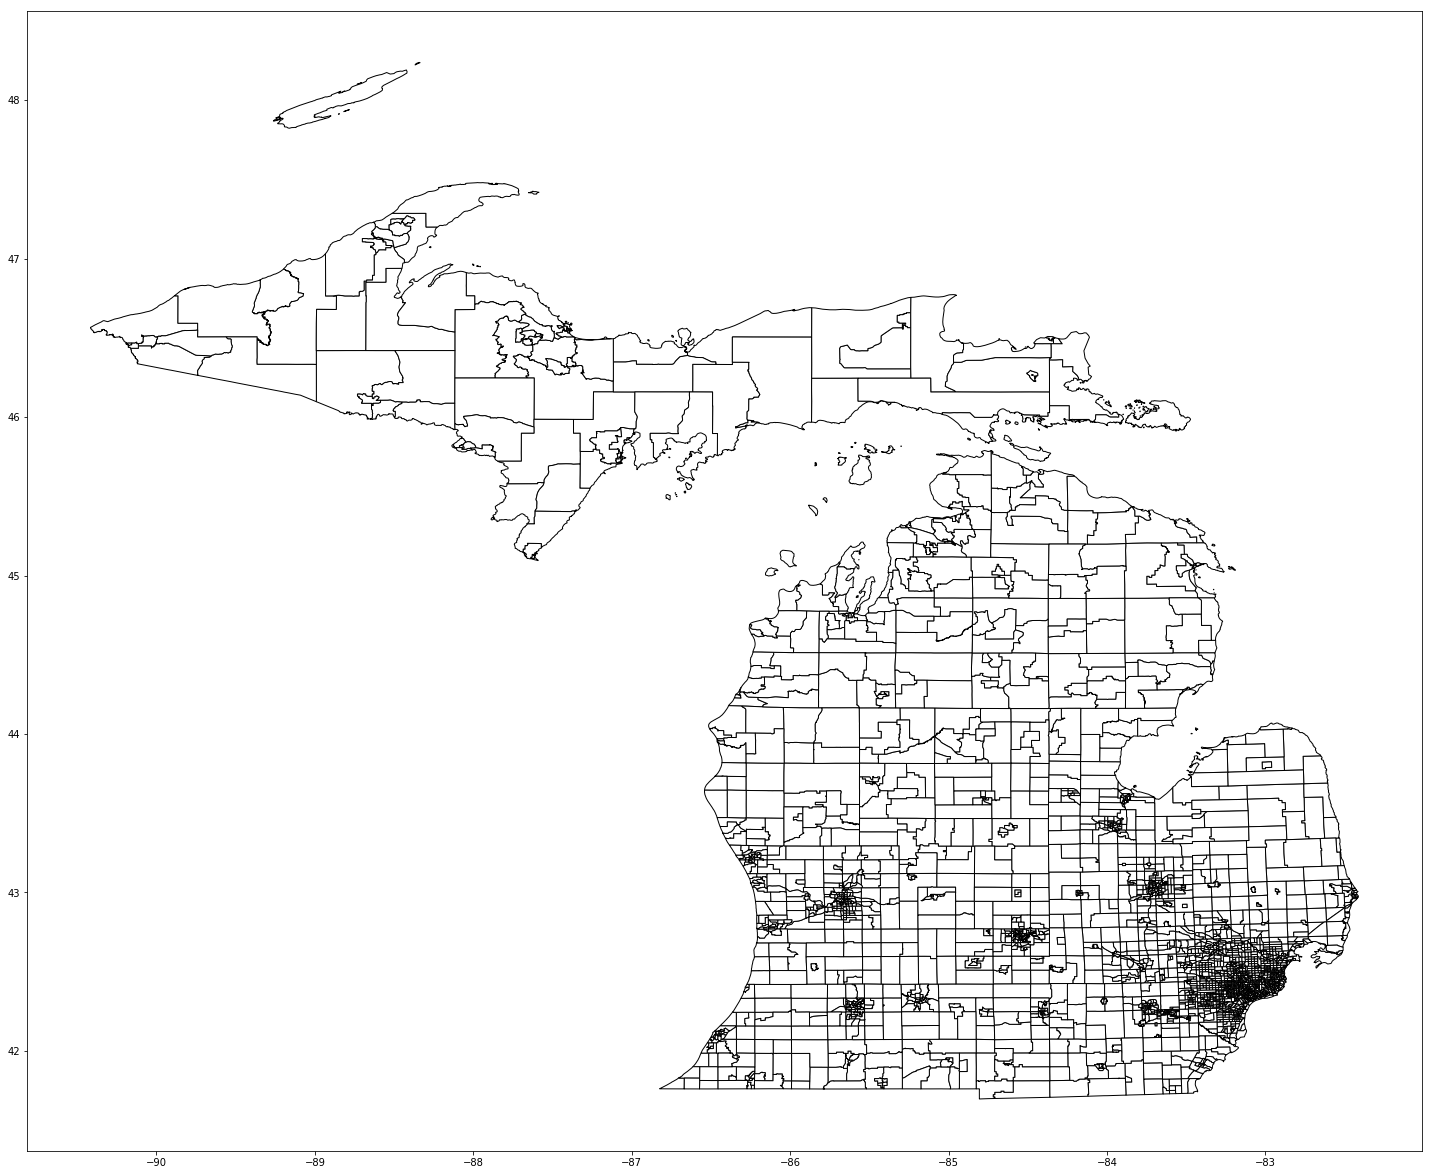

In [60]:
base = mi_census_tracts.plot(color='white', edgecolor='black', figsize=(25,25))

In [62]:
tri_county = mi_census_tracts[mi_census_tracts['COUNTYFP'].isin(['099', '125', '163'])]

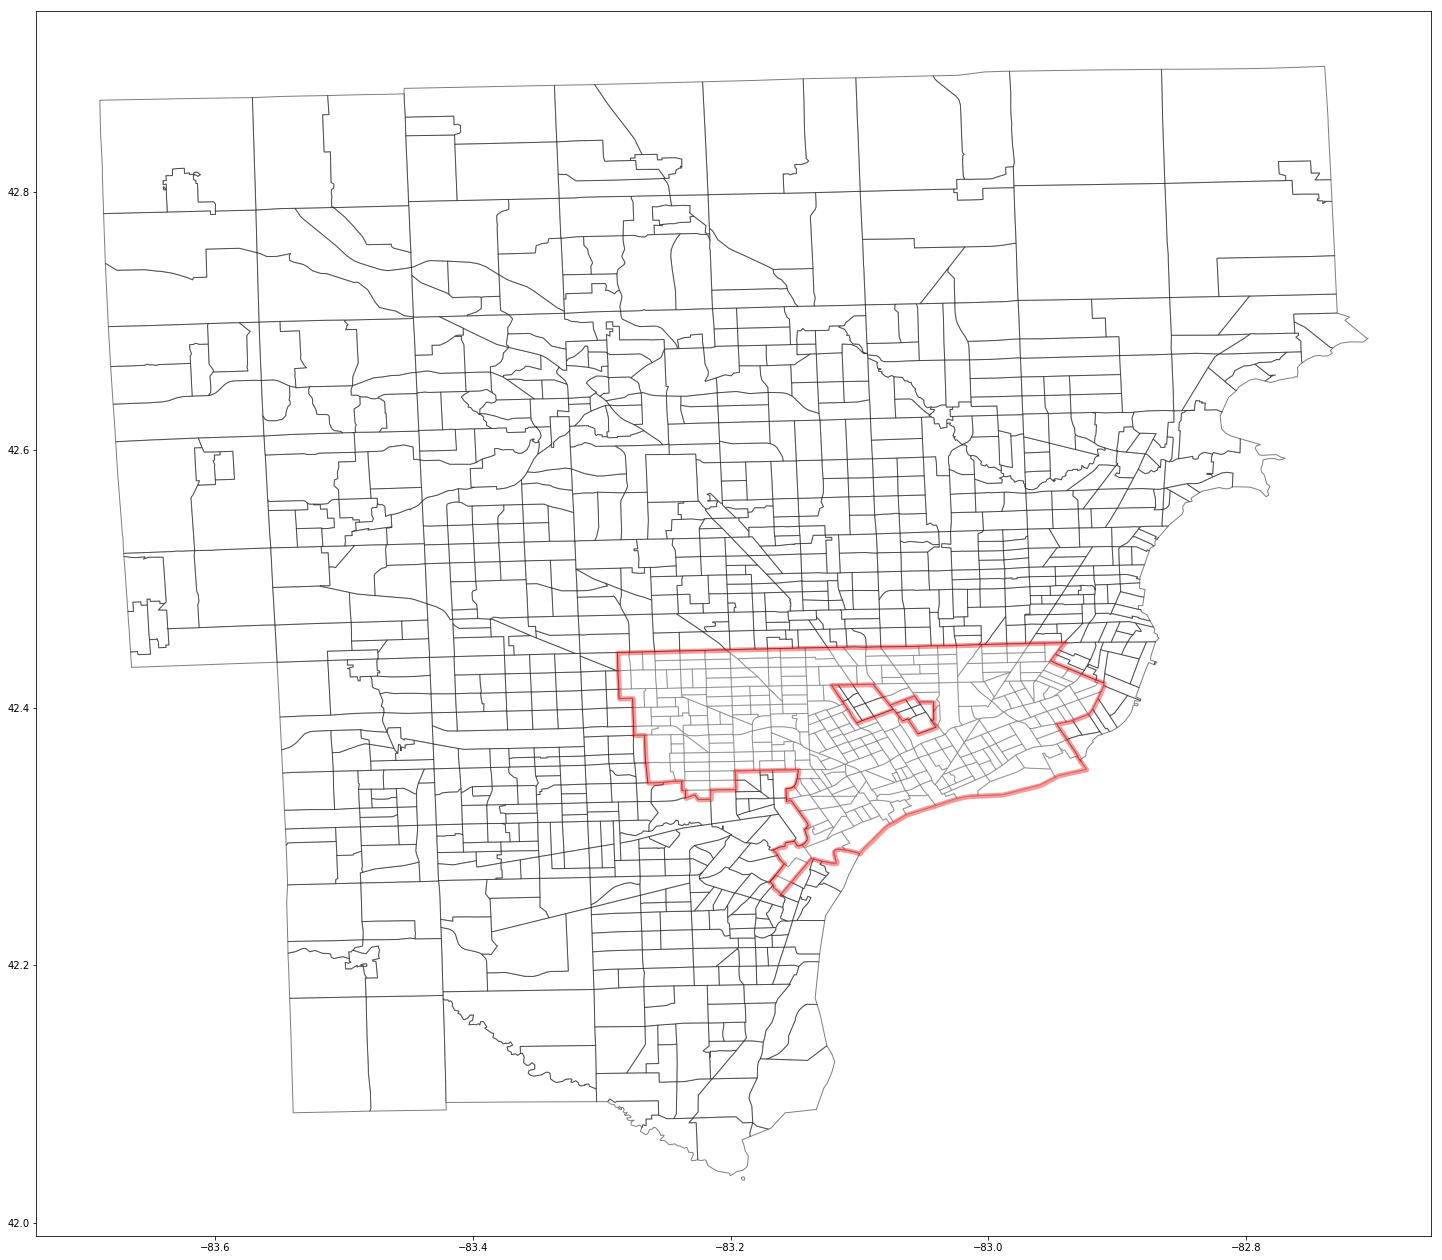

In [72]:
base = tri_county.plot(color='white', edgecolor='black', linewidth=1, alpha=0.5, figsize=(25,25))
detroit_city.plot(color='white', edgecolor='red', linewidth=5, alpha=0.4, ax=base)

In [18]:
ZIP_SHP_PATH = os.path.join('zip://', 'data_raw', 'SMART Bus Stops.zip')
coord_system = {'init': 'epsg:4326'}
smart_bus = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

In [34]:
ZIP_SHP_PATH = os.path.join('zip://', 'data_raw', 'SMART Park and Ride Routes.zip')
coord_system = {'init': 'epsg:4326'}
smart_pnr = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

In [22]:
ZIP_SHP_PATH = os.path.join('zip://', 'data_raw', 'QLine Route.zip')
coord_system = {'init': 'epsg:4326'}
qline_route = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

In [25]:
ZIP_SHP_PATH = os.path.join('zip://', 'data_raw', 'QLine Stops.zip')
coord_system = {'init': 'epsg:4326'}
qline_stops = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

In [29]:
ZIP_SHP_PATH = os.path.join('zip://', 'data_raw', 'Detroit People Mover Route.zip')
coord_system = {'init': 'epsg:4326'}
people_mover_route = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

In [32]:
ZIP_SHP_PATH = os.path.join('zip://', 'data_raw', 'MoGoStations.zip')
coord_system = {'init': 'epsg:4326'}
mogo_stations = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

In [45]:
ZIP_SHP_PATH = os.path.join('zip://', 'data_raw', 'DDOT_Bus_Routes.zip')
coord_system = {'init': 'epsg:4326'}
ddot_routes = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

In [55]:
ZIP_SHP_PATH = os.path.join('zip://', 'data_raw', 'DETROIT_BIKE_LANES.zip')
coord_system = {'init': 'epsg:4326'}
bike_lanes = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

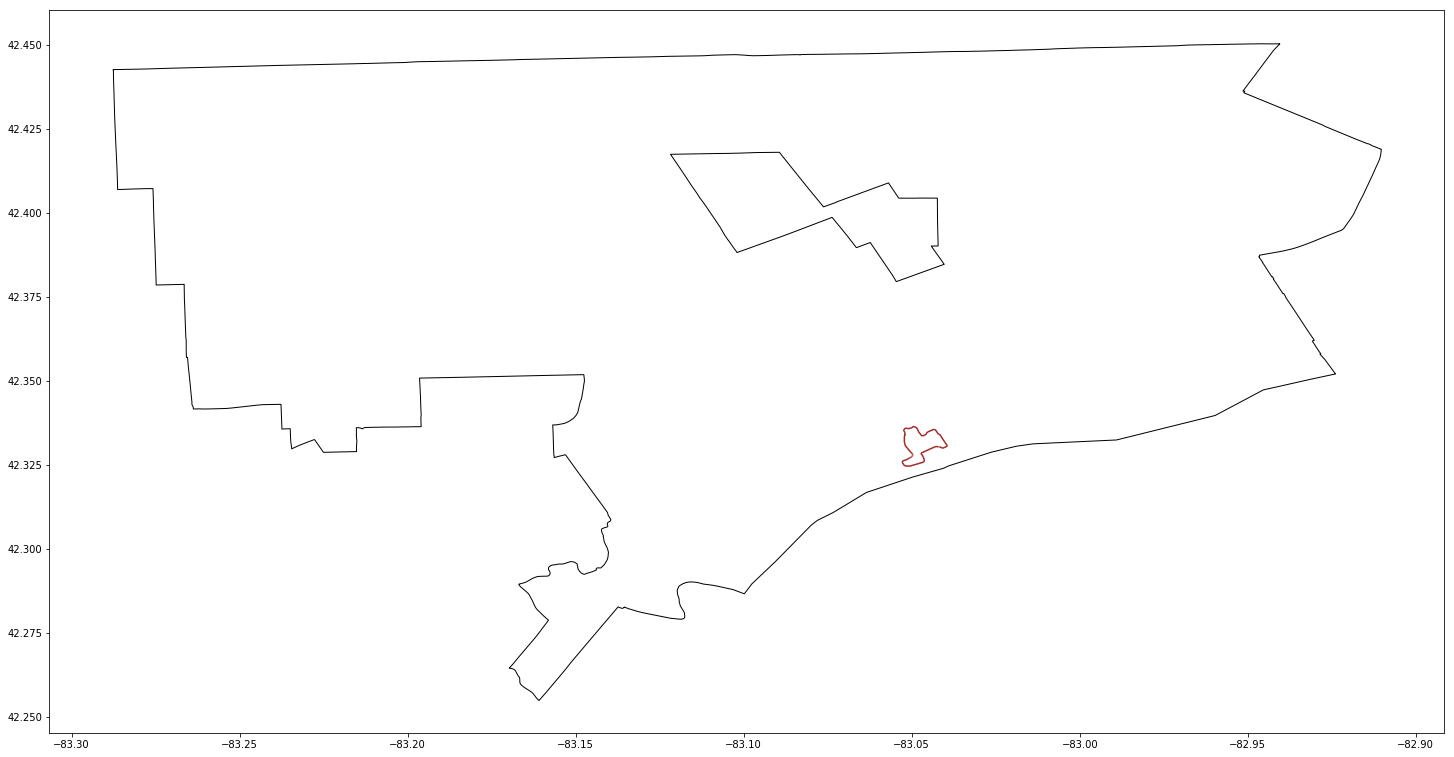

In [31]:
base = detroit_city.plot(color='white', edgecolor='black', figsize=(25,25))
people_mover_route.plot(ax=base, markersize=3, color='brown')

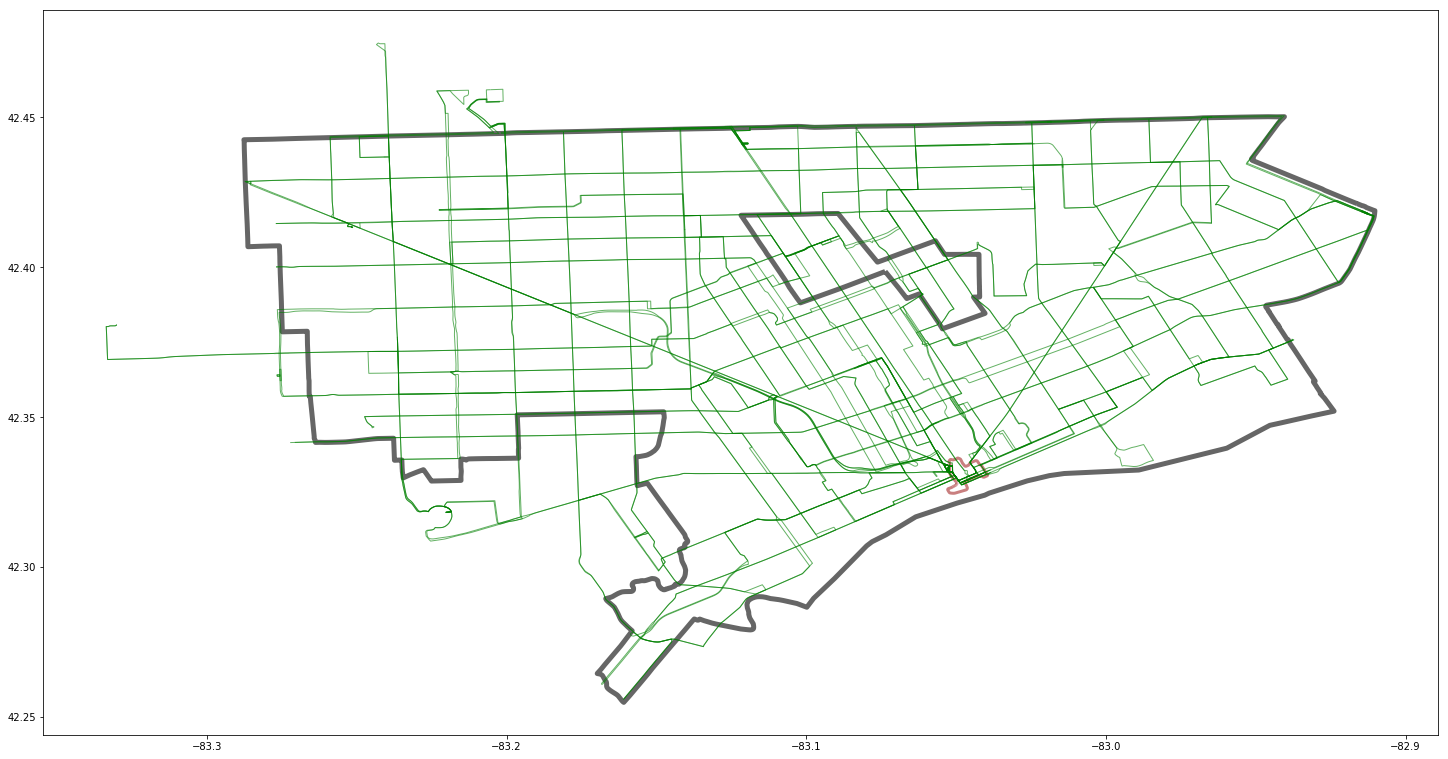

In [54]:
base = detroit_city.plot(color='white', edgecolor='black', linewidth=5, figsize=(25,25), alpha=0.6)
people_mover_route.plot(ax=base, linewidth=3, color='brown', alpha=0.6)
ddot_routes.plot(ax=base, linewidth=1, color='green', alpha=0.6)

In [37]:
smart_pnr.head()

,line_abbr,line_name,line_type,objectid,shape_leng,geometry
0,805,805 GRAND RIVER PARK & RIDE,FX,1.0,1.027802,(LINESTRING (-83.04420999999991 42.32900000000...
1,830,830 DOWNRIVER PARK & RIDE,FX,2.0,0.618174,(LINESTRING (-83.04327999999992 42.33129000000...
2,851,851 W BLOOMFLD F-HILLS P&R,FX,3.0,0.970641,(LINESTRING (-83.20530899999994 42.44705000000...


Text(0.5,1,'Detroit Smart Bus stops and Smart Park and Ride Stops')

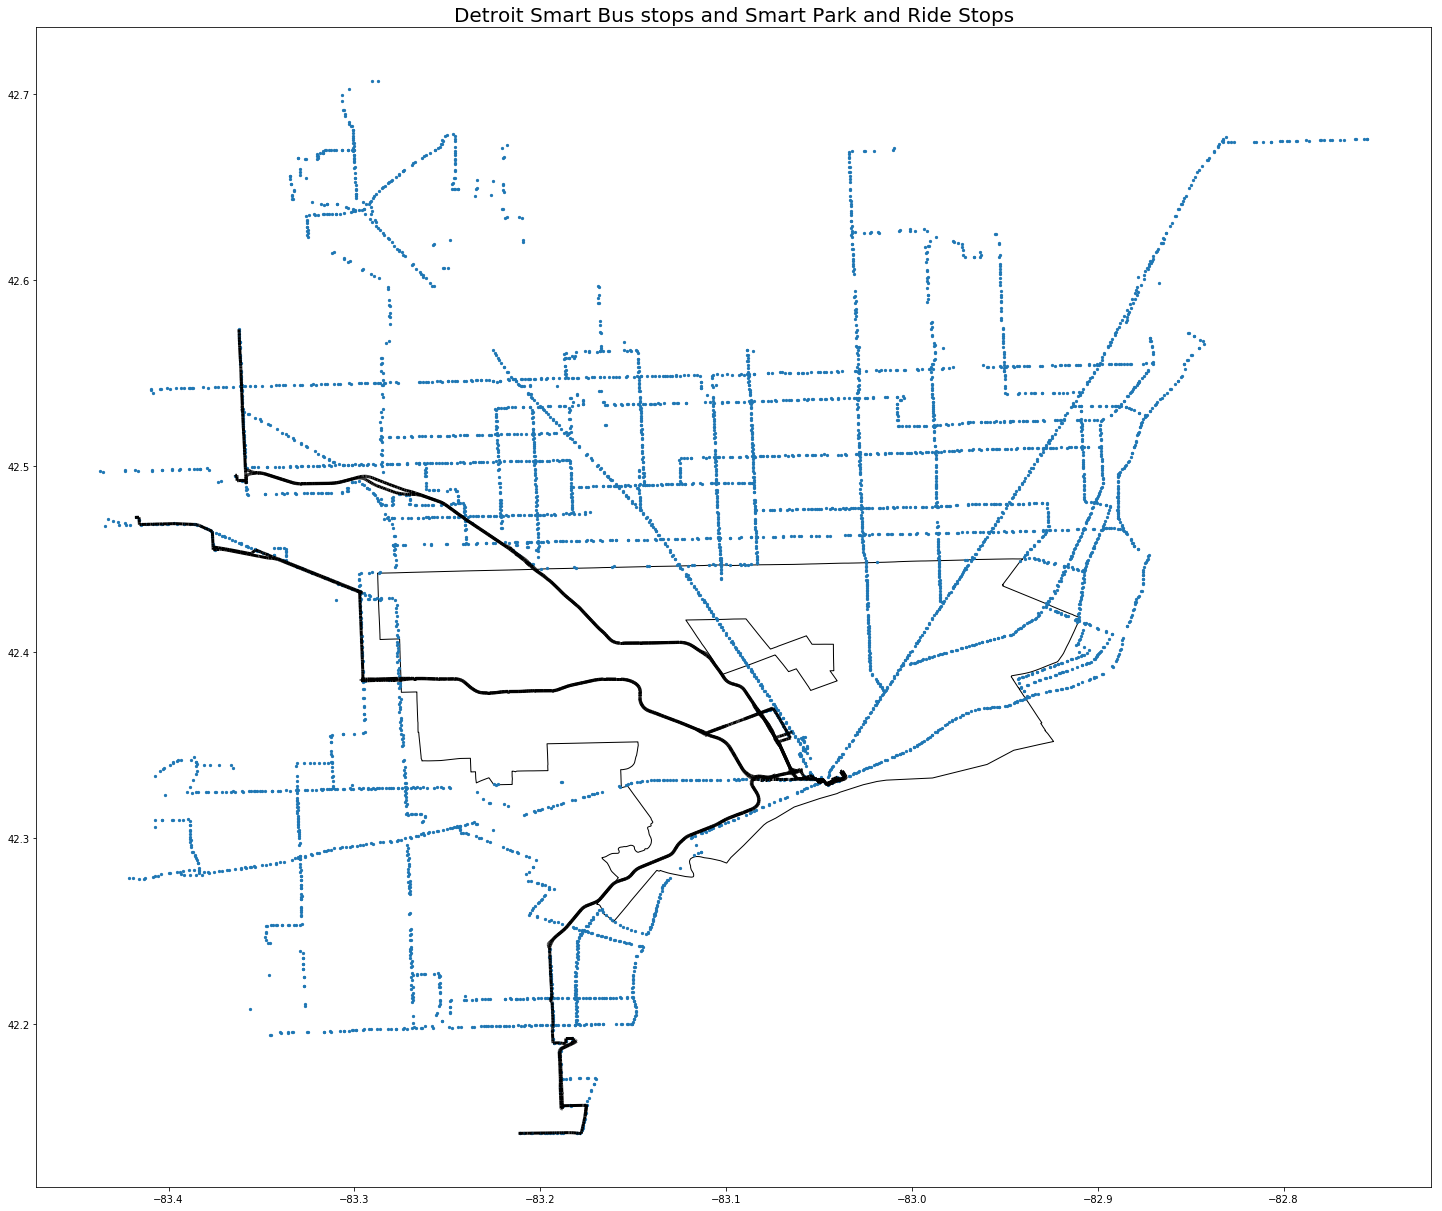

In [44]:
base = detroit_city.plot(color='white', edgecolor='black', figsize=(25,25))
smart_bus.plot(ax=base, markersize=5)
smart_pnr.plot(ax=base, linewidth=3, color='black')
base.set_title('Detroit Smart Bus stops and Smart Park and Ride Stops', fontsize=20)

Text(0.5,1,'Detroit Bike Lanes')

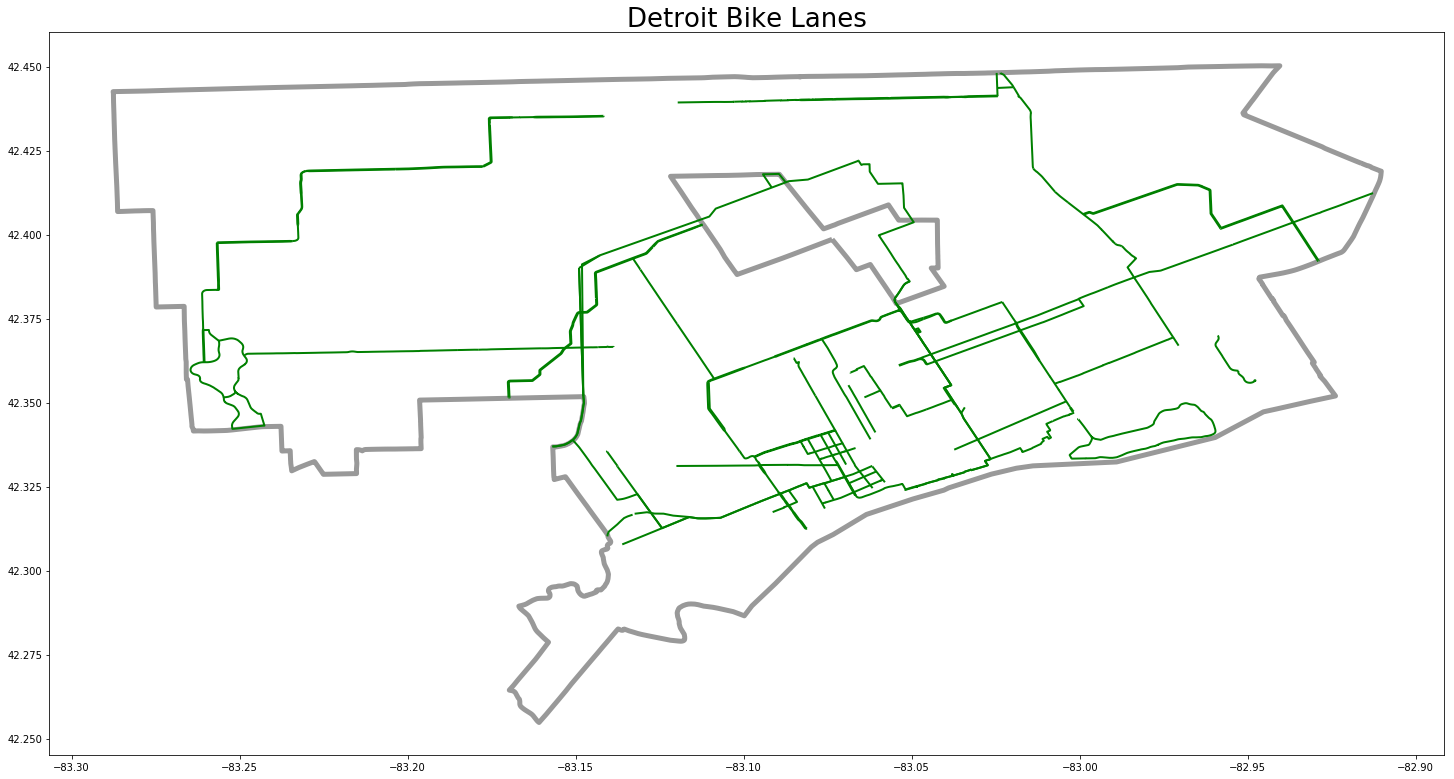

In [57]:
base = detroit_city.plot(color='white', edgecolor='black', linewidth=5, figsize=(25,25), alpha=0.4)
bike_lanes.plot(ax=base, linewidth=2, color='green')
base.set_title('Detroit Bike Lanes', fontsize=26)

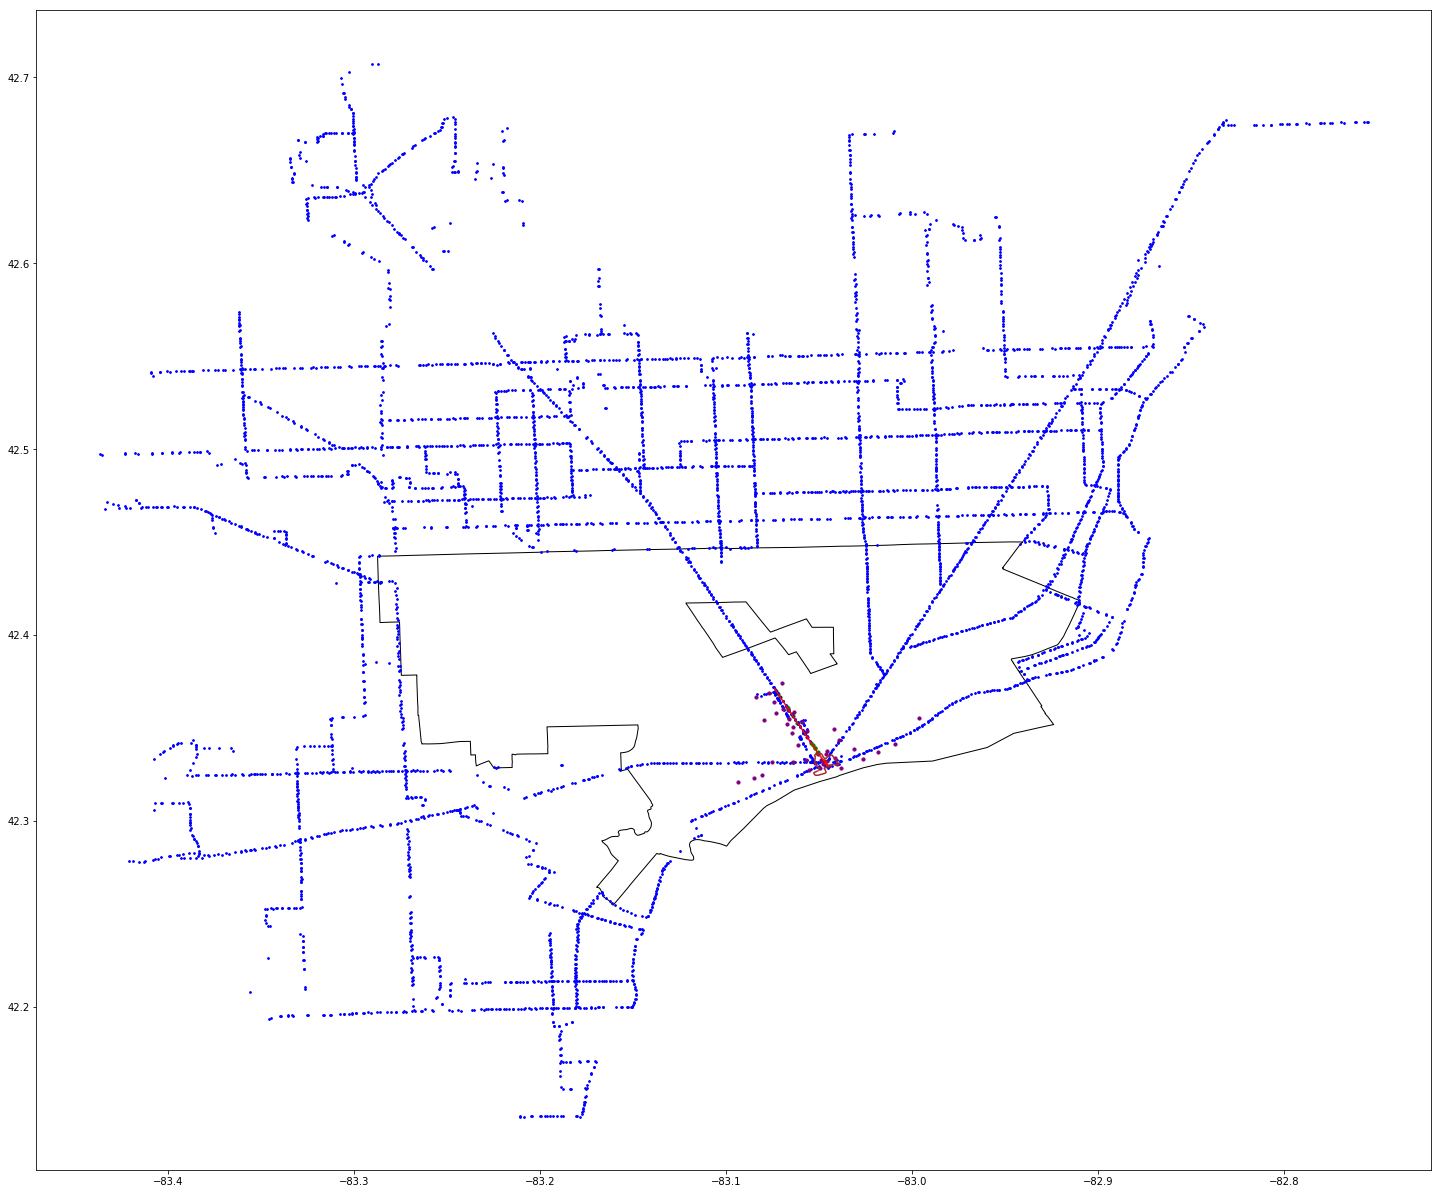

In [33]:
base = detroit_city.plot(color='white', edgecolor='black', figsize=(25,25))
qline_route.plot(ax=base, markersize=3, color='red')
qline_stops.plot(ax=base, markersize=10, color='green')
smart_bus.plot(ax=base, markersize=3, color='blue')
people_mover_route.plot(ax=base, markersize=3, color='brown')
mogo_stations.plot(ax=base, markersize=10, color='purple')